# **Tugas Besar Probstat Part 2: Melakukan EDA terhadap hasil kuesioner**
Author: Anindita Widya Santoso (18222128)

## **Analisis Dataset**
1) Lakukan preliminary analysis pada dataset sampel yang Anda dapatkan untuk
menjawab pertanyaan berikut:
    - a. Berapa dimensi dataset? (row dan column)
    - b. Jumlah missing value per kolom?
2) Buat 6 visualisasi (dengan tipe chart berbeda) dari dataset yang didapatkan. Boleh
menggunakan kolom manapun. Di bawah visualisasi berikan minimal 1 insight yang
didapatkan dari visualisasi.

3. Lakukan univariate analysis berikut:
    - a. Confidence interval 95% for one-sample proportion (hitung confidence
interval untuk 3 variabel yang berbeda, variabel bebas)
    - b. One sample Z-test for proportion dengan alpha = 5% (lakukan 3 tes untuk
variabel yang berbeda, variabel bebas)
    - c. Chi-squared test for goodness-of-fit test dengan alpha = 5% (H0: data
distribution = uniform distribution, H1: data distribution ≠ uniform distribution)
(lakukan 2 tes untuk variabel yang berbeda, variabel bebas)
4. Lakukan bivariate analysis berikut:
    - a. Confidence interval 95% for two-sample proportion difference (lakukan 3 tes
untuk sepasang variabel yang berbeda, pasangan variabel bebas)
    - b. Two-samples Z-test for proportion difference dengan alpha = 5% (lakukan 3
tes untuk sepasang variabel yang berbeda, pasangan variabel bebas)
    - c. Chi-squared test for independence dengan alpha = 5% (lakukan 2 tes untuk
sepasang variabel yang berbeda, pasangan variabel bebas)
    - d. Chi-squared test for Homogeneity dengan alpha = 5%(lakukan 2 tes untuk
sepasang variabel yang berbeda, pasangan variabel bebas)
5. Cari minimal 10 insight menarik dari hasil analisis Anda. Gunakan teknik “Story Telling
with Data” untuk membuat tampilan insight ini menarik. Tiap insight boleh dilengkapi
tabel/visualisasi.

HTML: https://drive.google.com/file/d/1wc454g02YNHVZJK0NcN61P9pPhiV6cZ7/view?usp=sharing

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import random

In [ ]:
# Read data from Excel file
data = pd.read_excel('/data/notebook_files/18222128.xlsx')
print(data.describe())

# Non-numeric data
def get_description(df):
    description_output = ""
    for column in df.select_dtypes(include=['object', 'category', 'bool', 'datetime64']):
        value_counts = df[column].value_counts()
        mode_value = df[column].mode()[0]
        description_output += f"---------- {column} ----------\n"
        description_output += "Value count:\n"
        description_output += value_counts.to_string() + "\n"
        description_output += "Mode:\n"
        description_output += str(mode_value) + "\n\n"
    return description_output

# Output
description_output = get_description(data)
print(description_output)

              Usia
count   293.000000
mean     37.972696
std     114.693633
min      14.000000
25%      19.000000
50%      24.000000
75%      46.000000
max    1980.000000
---------- Jenis Kelamin ----------
Value count:
Wanita    155
Pria      138
Mode:
Wanita

---------- Pendidikan Terakhir ----------
Value count:
SMA    124
S1     109
S2      35
D3      16
D4       6
S3       2
SMP      1
Mode:
SMA

---------- Pekerjaan ----------
Value count:
Pelajar / Mahasiswa                             138
Karyawan Swasta                                  72
Pegawai Negeri                                   23
Ibu Rumah Tangga                                 16
Pengusaha                                        14
Profesional ( Dokter, Dosen, Pengacara, dll)     11
Wiraswasta                                        4
Karyawan Bumd                                     2
Bapak Rumah Tangga                                1
Karyawan BUMD                                     1
Notaris                       

### 1. *Preliminary analysis* pada *dataset* sampel
- Berapa dimensi dataset? (row dan column)
- Jumlah missing value per kolom?

In [ ]:
# a. Dimensi dataset
rows, columns = data.shape
print(f"Dimensi Dataset")
print(f"Jumlah Baris: {rows}")
print(f"Jumlah Kolom: {columns}")

Dimensi Dataset
Jumlah Baris: 293
Jumlah Kolom: 150


In [ ]:
# b. Missing values per kolom (angka ada di paling kanan)
print("Jumlah Missing Value per Kolom:")
dict = {}
for column in data:
    dict[column] = data[column].isna().sum()
dict = [dict]
missing_values = pd.DataFrame(dict)
missing_values = missing_values.T
missing_values = missing_values.rename(columns={0 : "count"})
missing_values

Jumlah Missing Value per Kolom:


,count
Jenis Kelamin,0
Usia,0
Pendidikan Terakhir,0
Pekerjaan,0
Penghasilan per Bulan,0
...,...
keluhan_belanja_online_2,198
keluhan_belanja_online_3,204
keluhan_belanja_online_4,234
keluhan_belanja_online_5,255


In [ ]:
# Menampilkan data awal (20 baris pertama)
first_20_rows = data.head(20)
first_20_rows

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,56,S1,Karyawan Swasta,> Rp 10 juta,Jakarta,600%,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Pria,49,S1,Karyawan Swasta,> Rp 10 juta,Jakarta,800%,Ya,tuntutan pekerjaan,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
2,Wanita,19,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,bogor,700%,Ya,Streaming video/ film,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
3,Pria,56,S2,Notaris,Rp 5 juta – Rp 10 juta,Kisaran,1000%,Tidak,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pria,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,1200%,Tidak,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Wanita,20,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Yogyakarta,NaN,Ya,Delivery Makanan,NaN,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
6,Pria,19,S1,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,NaN,Ya,Streaming video/ film,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
7,Pria,50,S2,Karyawan Swasta,> Rp 10 juta,Jakarta,500%,Ya,Menonton e-sport,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
8,Wanita,53,D3,Karyawan Swasta,Rp 2 juta – Rp 5 juta,Jakarta,1800%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,menggunakan fitur Paylater,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
9,Pria,34,S1,Karyawan Swasta,> Rp 10 juta,Blitar,1200%,Ya,Berbelanja online,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


### Data Cleaning

Perlu dilakukan data cleaning sebelum dilakukan visualisasi, hal tersebut dilakukan dengan:
1. Drop kolom dengan missing values lebih banyak dari seperempat jumlah dataset
2. Menghilangkan data outlier
3. Menghilangkan duplikat

In [ ]:
# Drop column dengan jumlah missing value > 293 * 0.3

def drop_columns(df):
    count = 0
    for column in df:
        if df[column].isna().sum() > len(df) * 0.3:
            df.drop(column, axis=1, inplace=True)
            print("Dropped column", column)
            count += 1
    print("Total Dropped Columns:", count)

drop_columns(data)

Dropped column Aktivitas yang Meningkat dalam 3 Bulan Terakhir
Dropped column layanan_aktif_2
Dropped column layanan_aktif_3
Dropped column layanan_aktif_4
Dropped column layanan_aktif_5
Dropped column layanan_aktif_6
Dropped column bank_1
Dropped column bank_2
Dropped column bank_3
Dropped column bank_4
Dropped column bank_5
Dropped column bank_6
Dropped column bank_7
Dropped column 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ]
Dropped column 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking]
Dropped column 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Datang ke cabang bank]
Dropped column keluhan_2
Dropped column keluhan_3
Dropped column keluhan_4
Dropped column emoney_pilihan_2
Dropped column emoney_pilihan_3
Dropped column emoney_pilihan_4
Dropped column emoney_pilihan_5
Dropped column emoney_pilihan_6
Dropped column emoney_pilihan_7
Dropped column emoney_pilihan_8
Dropped column emoney_pilihan_9
Dropped column emoney_p

In [ ]:
# Menghilangkan kolom dengan outlier, untuk numerikal (hanya kolom usia)

Q1 = data['Usia'].quantile(0.25)
Q3 = data['Usia'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Before dropping outliers: Data length", len(data))
data = data[(data['Usia'] >= lower_bound) & (data['Usia'] <= upper_bound)]
print("After dropping outliers: Data length", len(data))

Before dropping outliers: Data length 293
After dropping outliers: Data length 292


In [ ]:
# Menghilangkan duplicates
print("Before dropping duplicates: Data length", len(data))
data = data.drop_duplicates()
print("After dropping duplicates: Data length", len(data))

Before dropping duplicates: Data length 292
After dropping duplicates: Data length 292


In [ ]:
# Rename nama columns
data = data.rename(columns={"Durasi Penggunaan Internet per Hari (dalam Jam)": "Durasi Internet"})

# Convert data string ke numerik
data['Durasi Internet'] = data['Durasi Internet'].str.replace("%", "", regex=False)
data['Durasi Internet'] = pd.to_numeric(data['Durasi Internet'], errors='coerce')

# Mengubah kesalahan data
data['Durasi Internet'] = data['Durasi Internet'] / 100

In [ ]:
# Menampilkan data
data

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Internet,Aktivitas Online Meningkat,layanan_aktif_1,18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM],...,47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [pulsa (data & komunikasi)],47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [makanan & minuman],47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [tiket pesawat tiket kereta api hotel],47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [tiket bioskop tiket wisata],tempat_belanja_online_1,tempat_belanja_online_2,ecommerce_pilihan_1,"50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?",alasan_belanja_offline_1,alasan_belanja_offline_2
0,Pria,56,S1,Karyawan Swasta,> Rp 10 juta,Jakarta,6.0,Ya,Mobile Banking,2-5 kali per bulan,...,NaN,NaN,NaN,NaN,Marketplace (seperti Lazada,Jasa Layanan Delivery Online (seperti Happyfresh,Shopee,GrabFood,Dapat memilih barang langsung,Dapat mengecek keaslian dan kualitas Lebih aman
1,Pria,49,S1,Karyawan Swasta,> Rp 10 juta,Jakarta,8.0,Ya,Mobile Banking,6-9 kali per bulan,...,online,offline/ langsung datang ke toko fisik,online,online,Marketplace (seperti Lazada,Jasa Layanan Delivery Online (seperti Happyfresh,Shopee,GoFood,Dapat memilih barang langsung,Dapat mengecek keaslian dan kualitas Lebih aman
2,Wanita,19,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,bogor,7.0,Ya,Mobile Banking,6-9 kali per bulan,...,online,online,online,online,Marketplace (seperti Lazada,Jasa Layanan Delivery Online (seperti Happyfresh,Shopee,ShopeeFood,Dapat memilih barang langsung,NaN
3,Pria,56,S2,Notaris,Rp 5 juta – Rp 10 juta,Kisaran,10.0,Tidak,Mobile Banking,Kurang dari/ setidaknya 1 kali per bulan,...,online,online,online,online,Marketplace (seperti Lazada,NaN,Shopee,GrabFood,Dapat memilih barang langsung,Dapat mengecek keaslian dan kualitas Lebih aman
4,Pria,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,12.0,Tidak,Mobile Banking,Tidak Pernah,...,online,offline/ langsung datang ke toko fisik,online,online,Marketplace (seperti Lazada,Jasa Layanan Delivery Online (seperti Happyfresh,Shopee,GoFood,NaN,Dapat mengecek keaslian dan kualitas Lebih aman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Banjarmasin,5.0,Ya,NaN,6-9 kali per bulan,...,online,offline/ langsung datang ke toko fisik,online,online,Marketplace (seperti Lazada,NaN,Shopee,ShopeeFood,NaN,NaN
289,Pria,51,S2,Pegawai Negeri,> Rp 10 juta,Kabupaten Bogor,12.0,Ya,Mobile Banking,NaN,...,online,online,online,online,Marketplace (seperti Lazada,NaN,NaN,GoFood,Dapat memilih barang langsung,NaN
290,Pria,24,D3,Pegawai Negeri,Rp 2 juta – Rp 5 juta,Tangerang,5.0,Tidak,Mobile Banking,2-5 kali per bulan,...,online,online,online,offline/ langsung datang ke toko fisik,Marketplace (seperti Lazada,Jasa Layanan Delivery Online (seperti Happyfresh,NaN,GrabFood,Dapat memilih barang langsung,NaN
291,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,15.0,Sama saja,Mobile Banking,NaN,...,online,offline/ langsung datang ke toko fisik,online,online,Marketplace (seperti Lazada,Jasa Layanan Delivery Online (seperti Happyfresh,NaN,GrabFood,Dapat memilih barang langsung,NaN


### 2. Visualisasi dari *dataset* dan insight yang didapatkan

- Visualisasi usia dengan *histogram*
- Visualisasi gender dengan *bar chart*
- Visualisasi pendidikan terakhir dengan *horizontal bar chart*
- Visualisasi preferensi metode belanja dengan *pie chart*
- Visualisasi hubungan durasi internet dan usia dengan *scatter plot*
- Visualisasi hubungan pendidikan terakhir dan pendapatan dengan *heat map*

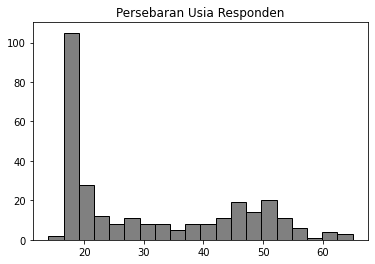

In [ ]:
# 1. Histogram untuk Usia

# Custom bin edges
bins = [0, 18, 35, 50, 100]

# Creating age groups with custom bins
age_groups = pd.cut(data['Usia'], bins=bins)

# Count the number of ages in each bin
age_group_counts = pd.value_counts(age_groups)

# Histogram
plt.hist(data['Usia'], bins=20, color="Grey", edgecolor='black')
plt.title("Persebaran Usia Responden")
plt.show()

Mengamati grafik persebaran usia responden, terlihat bahwa mayoritas responden adalah generasi muda, dengan puncak jumlah di kelompok usia awal 20-an. Ini mencerminkan keterlibatan kuat generasi muda dalam survei ini, yang mungkin terhubung dengan topik survei yang relevan dengan minat dan kegiatan mereka, seperti teknologi atau tren belanja online.

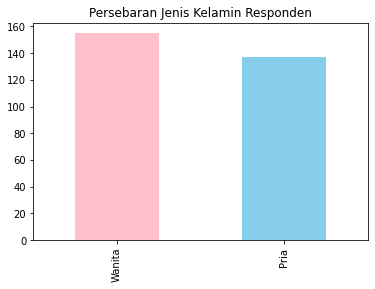

In [ ]:
# 2. Bar Chart untuk Jenis Kelamin

# Count the number of ages in each bin
gender_count = pd.value_counts(data['Jenis Kelamin'])

# Plotting
gender_count.plot(kind='bar', color=['pink', 'skyblue'])

# Bar Chart Title
plt.title ('Persebaran Jenis Kelamin Responden')
plt.show()

Perbandingan jenis kelamin responden terbagi hampir rata, dengan sedikit lebih banyak wanita yang berpartisipasi dalam survei. Keseimbangan ini menandakan bahwa survei tersebut berhasil menarik perhatian lintas gender, memberikan perspektif yang beragam terhadap topik yang dibahas.

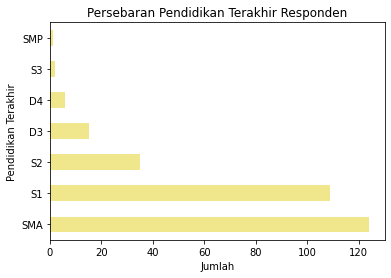

In [ ]:
# 3. Horizontal Bar Chart Pendidikan Terakhir

# Count the number of last education in the bin
pendidikanterakhir = pd.value_counts(data['Pendidikan Terakhir'])

# Plotting
pendidikanterakhir.plot(kind='barh', color="khaki")

# Horizontal Bar Chart Title
plt.title('Persebaran Pendidikan Terakhir Responden')
plt.xlabel('Jumlah'); plt.ylabel('Pendidikan Terakhir')
plt.show()

Dalam grafik persebaran pendidikan terakhir, terdapat kecenderungan responden memiliki latar belakang pendidikan SMA dan S1. Ini menunjukkan bahwa survei mungkin lebih menarik bagi mereka yang berada di fase awal karier atau yang masih terlibat dalam pendidikan tinggi.

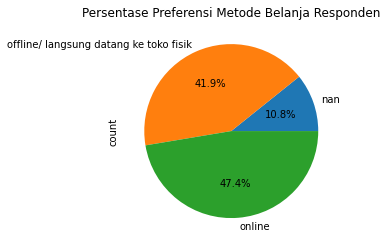

In [ ]:
# 4. Pie Chart Preferensi Metode Belanja

# Count all the values in columns that starts with "47."
count_aggregate = {}
for cat in data:
    if cat.startswith('47.'):
        for values in data[cat]:
            if values not in count_aggregate:
                count_aggregate[values] = 0
            else:
                count_aggregate[values] += 1

# Transform dict into list
count_aggregate = [count_aggregate]

# Transpose and rename to fit dataframe
df = pd.DataFrame(count_aggregate)
df = df.T
df = df.rename(columns={0: "count"})

# Plotting
df.plot(kind='pie', autopct='%1.1f%%', y='count', legend=False)

# Pie Chart Title
plt.title("Persentase Preferensi Metode Belanja Responden")
plt.show()

Pie chart mengenai preferensi metode belanja menunjukkan bahwa hampir setengah dari responden lebih memilih belanja *online* dibandingkan datang langsung ke toko fisik. Hal ini bisa jadi merupakan dampak dari perubahan kebiasaan selama pandemi, di mana orang lebih memilih kenyamanan dan keamanan belanja dari rumah.

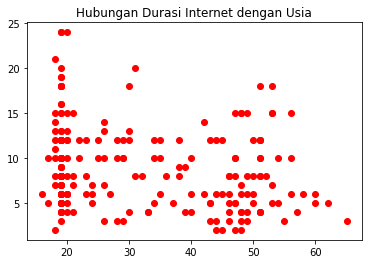

In [ ]:
# 5. Scatter Plot Hubungan Durasi Internet dengan Usia

# Plotting
plt.scatter(data['Usia'], data['Durasi Internet'], color="Red")

# Scatter Plot Title
plt.title("Hubungan Durasi Internet dengan Usia")
plt.show()

Dari *plot* hubungan durasi internet dengan usia, tampak bahwa tidak ada pola yang jelas mengikuti usia. Hal ini menunjukkan bahwa akses dan penggunaan internet telah merata di semua kelompok usia, meski terdapat beberapa *outlier* yang menghabiskan waktu lebih lama secara online di usia yang lebih tua.

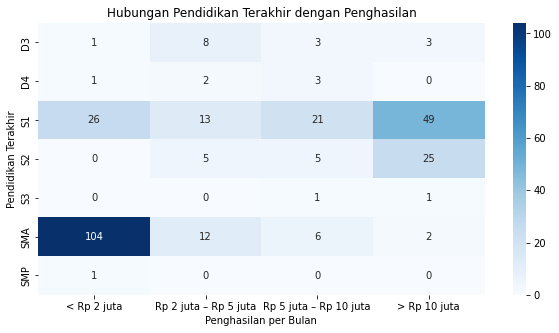

In [ ]:
# 6. Heat Map Hubungan Pekerjaan dengan Penghasilan

# Define column order
col_order = ['< Rp 2 juta', 'Rp 2 juta – Rp 5 juta', 'Rp 5 juta – Rp 10 juta', '> Rp 10 juta']

# Create a crosstab of the two attributes
ctab = pd.crosstab(data['Pendidikan Terakhir'], data['Penghasilan per Bulan'])
ctab = ctab.reindex(columns=col_order, fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(ctab, annot=True, cmap='Blues', fmt='g')

# Heat Map Title
plt.title("Hubungan Pendidikan Terakhir dengan Penghasilan")
plt.show()

Heatmap hubungan antara pendidikan terakhir dan penghasilan mengungkapkan bahwa sebagian besar responden dengan pendidikan SMA lebih cenderung berpenghasilan di bawah Rp 2 juta. Sementara itu, responden dengan pendidikan S1 lebih banyak berada dalam kategori penghasilan Rp 2 juta hingga Rp 10 juta. Ini mengindikasikan bahwa tingkat pendidikan memiliki korelasi dengan tingkat penghasilan.

### 3. Univariate Analysis
- Confidence interval 95% for one-sample proportion
- One sample Z-test for proportion dengan alpha = 5%
- Chi-squared test for goodness-of-fit test dengan alpha = 5%

In [ ]:
# a. Confidence Interval 95% for one-sample proportion
print("Confidence Interval 95% for one-sample proportion analysis:")
count = 0
for column in data.columns:
    if len(data[column].dropna().unique()) == 2:
        successes = data[column].value_counts().iloc[0]
        total = data[column].count()
        low_bound, up_bound = proportion_confint(successes, total, alpha=0.05, method='normal')
        proportion = successes / total
        print(f"Column: {column}")
        print(f"H0: The true proportion is 0.5")
        print(f"H1: The true proportion is not 0.5")
        print(f"Lower Confidence Interval Bound: {round(low_bound, 3)}")
        print(f"Upper Confidence Interval Bound: {round(up_bound, 3)}")
        print(f"Proportion: {round(proportion, 3)}")
        if low_bound < 0.5 and up_bound > 0.5:
            print("Fail to reject H0.")
        else:
            print("Reject H0.")
        print()
        print("----------------------------------")
        count += 1
        if count > 2:
            break

Confidence Interval 95% for one-sample proportion analysis:
Column: Jenis Kelamin
H0: The true proportion is 0.5
H1: The true proportion is not 0.5
Lower Confidence Interval Bound: 0.474
Upper Confidence Interval Bound: 0.588
Proportion: 0.531
Fail to reject H0.

----------------------------------
Column: 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]
H0: The true proportion is 0.5
H1: The true proportion is not 0.5
Lower Confidence Interval Bound: 0.52
Upper Confidence Interval Bound: 0.637
Proportion: 0.579
Reject H0.

----------------------------------
Column: 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [groceries / keperluan sehari- hari]
H0: The true proportion is 0.5
H1: The true proportion is not 0.5
Lower Confidence Interval Bound: 0.686
Upper Confidence Interval Bound: 0.792
Proportion: 0.739
Reject H0.

----------------------------------


In [ ]:
# b. One-sample Z-test for proportion, alpha = 5%
count = 0
print("One-sample Z-test for proportion analysis:")
for column in data.columns:
    if len(data[column].dropna().unique()) == 2:
        n_success = data[column].value_counts().iloc[0]
        n_obs = data[column].count()
        z_stat, p_value = proportions_ztest(n_success, n_obs, value=0.5)
        print(f"Column: {column}")
        print(f"H0: The true proportion is 0.5")
        print(f"H1: The true proportion is not 0.5")
        print(f"Z-Statistic: {round(z_stat, 4)}")
        print(f"P-Value: {round(p_value, 4)}")
        if p_value < 0.05:
            print("Reject H0.")
        else:
            print("Fail to reject H0.")
        print()
        print("----------------------------------")
        count += 1
        if count >= 3:
            break

One-sample Z-test for proportion analysis:
Column: Jenis Kelamin
H0: The true proportion is 0.5
H1: The true proportion is not 0.5
Z-Statistic: 1.0554
P-Value: 0.2913
Fail to reject H0.

----------------------------------
Column: 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]
H0: The true proportion is 0.5
H1: The true proportion is not 0.5
Z-Statistic: 2.6354
P-Value: 0.0084
Reject H0.

----------------------------------
Column: 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [groceries / keperluan sehari- hari]
H0: The true proportion is 0.5
H1: The true proportion is not 0.5
Z-Statistic: 8.8247
P-Value: 0.0
Reject H0.

----------------------------------


In [ ]:
# c. Chi-squared test for goodness-of-fit test, alpha = 5%
count = 0
print("Chi-squared test for goodness-of-fit analysis:")
for col in data.columns:
    if data[col].nunique() > 2 and len(data[col].dropna()) > 5 * data[col].nunique():
        f_obs = data[col].value_counts()
        f_exp = np.ones_like(f_obs) * f_obs.sum() / len(f_obs)
        chi2_stat, p_value = chisquare(f_obs, f_exp=f_exp)
        print(f"Column: {col}")
        print(f"H0: The sample distribution fits the expected uniform distribution")
        print(f"H1: The sample distribution does not fit the expected uniform distribution")
        print(f"Chi2-Statistic: {round(chi2_stat, 4)}")
        print(f"P-Value: {round(p_value, 4)}")
        if p_value < 0.05:
            print("Reject H0.")
        else:
            print("Fail to reject H0.")
        print()
        print("----------------------------------")
        count += 1
        if count >= 2:
            break

Chi-squared test for goodness-of-fit analysis:
Column: Usia
H0: The sample distribution fits the expected uniform distribution
H1: The sample distribution does not fit the expected uniform distribution
Chi2-Statistic: 1225.1986
P-Value: 0.0
Reject H0.

----------------------------------
Column: Pendidikan Terakhir
H0: The sample distribution fits the expected uniform distribution
H1: The sample distribution does not fit the expected uniform distribution
Chi2-Statistic: 397.1644
P-Value: 0.0
Reject H0.

----------------------------------


### 4. Bivariate Analysis
- Confidence interval 95% for two-sample proportion difference
- Two-samples Z-test for proportion difference dengan alpha = 5%
- Chi-squared test for independence dengan alpha = 5%
- Chi-squared test for Homogeneity dengan alpha = 5%

In [ ]:
# a. Confidence interval 95% for two-sample proportion difference

def test_proportion_difference(data, group_column, target_column, target_value):
    if group_column not in data.columns or target_column not in data.columns:
        raise ValueError("Specified columns are not in the DataFrame")
    if target_value not in data[target_column].unique():
        raise ValueError("Target value not found in target column")
    count = data.groupby(group_column)[target_column].apply(lambda x: (x == target_value).sum())
    nobs = data[group_column].value_counts()
    stat, pval = proportions_ztest(count=count, nobs=nobs)
    confint = proportion_confint(count=count, nobs=nobs, alpha=0.05)
    results = f"Berdasarkan {group_column}:\n"
    for group in count.index:
        results += f"\nGroup '{group}':\n"
        results += f"- Count of '{target_value}': {count[group]}\n"
        results += f"- Number of Observations: {nobs[group]}\n"
        results += f"- Proportion: {count[group] / nobs[group]:.2f}\n"
        results += f"- 95% Confidence Interval: ({confint[0][group]:.2f}, {confint[1][group]:.2f})\n"
    results += f"\nZ-test Statistic: {stat:.2f}\n"
    results += f"P-value: {pval:.4f}\n"
    results += "H0: selisih pair = 0\n"
    results += "H1: selisih pair ≠ 0\n"
    if pval < 0.05:
        results += "Reject H0.\n"
    else:
        results += "Fail to reject H0.\n"
    return results

try:
    pair_1_results = test_proportion_difference(data, 'Jenis Kelamin', '40. Berapa frekuensi top up/ Isi ulang ?', 'Sering (kurang lebih 1 kali seminggu)')
    print("Pair 1: Frekuensi Top Up", pair_1_results)
    print("----------------------------------")
    pair_2_results = test_proportion_difference(data, 'Jenis Kelamin', '45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?', 'Meningkat')
    print("Pair 2: Belanja Online", pair_2_results)
    print("----------------------------------")
    pair_3_results = test_proportion_difference(data, 'Jenis Kelamin', '47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]', 'online')
    print("Pair 3: Kecenderungan Belanja Fashion", pair_3_results)

except ValueError as e:
    print(e)

Pair 1: Frekuensi Top Up Berdasarkan Jenis Kelamin:

Group 'Pria':
- Count of 'Sering (kurang lebih 1 kali seminggu)': 53
- Number of Observations: 137
- Proportion: 0.39
- 95% Confidence Interval: (0.27, 0.42)

Group 'Wanita':
- Count of 'Sering (kurang lebih 1 kali seminggu)': 52
- Number of Observations: 155
- Proportion: 0.34
- 95% Confidence Interval: (0.30, 0.46)

Z-test Statistic: -0.67
P-value: 0.5037
H0: selisih pair = 0
H1: selisih pair ≠ 0
Fail to reject H0.

----------------------------------
Pair 2: Belanja Online Berdasarkan Jenis Kelamin:

Group 'Pria':
- Count of 'Meningkat': 40
- Number of Observations: 137
- Proportion: 0.29
- 95% Confidence Interval: (0.19, 0.33)

Group 'Wanita':
- Count of 'Meningkat': 53
- Number of Observations: 155
- Proportion: 0.34
- 95% Confidence Interval: (0.31, 0.47)

Z-test Statistic: -2.36
P-value: 0.0184
H0: selisih pair = 0
H1: selisih pair ≠ 0
Reject H0.

----------------------------------
Pair 3: Kecenderungan Belanja Fashion Berdasar

In [ ]:
# b. Two-samples Z-test for proportion difference, alpha = 5%

def calculate_proportions(data, group_column, filter_column=None, filter_values=None, compare_groups=None):
    if filter_column and filter_values:
        filtered_data = data[data[filter_column].isin(filter_values)]
    else:
        filtered_data = data
    if compare_groups and len(compare_groups) == 2:
        filtered_counts = filtered_data[group_column].value_counts().reindex(compare_groups, fill_value=0)
        total_counts = data[group_column].value_counts().reindex(compare_groups, fill_value=0)
    else:
        raise ValueError("Please specify two groups to compare.")
    return filtered_counts, total_counts
def format_ztest_output(pair_name, ztest_result, group_counts, total_counts):
    stat, pval = ztest_result
    results = f"{pair_name} Z-test Results:\n"
    results += f"Z-test Statistic: {stat:.2f}, P-value: {pval:.4f}\n\n"
    for group in group_counts.index:
        proportion = group_counts[group] / total_counts[group]
        results += f"Group '{group}':\n"
        results += f"- Count in Filtered Data: {group_counts[group]}\n"
        results += f"- Count in Total Data: {total_counts[group]}\n"
        results += f"- Proportion: {proportion:.2f}\n"
    results += "H0: Proporsi pair sama (p1 = p2)\n"
    results += "H1: Proporsi pair tidak sama (p1 ≠ p2)\n"
    if pval < 0.05:
        results += "Reject H0.\n"
    else:
        results += "Fail to reject H0.\n"
    return results

try:
    gender_work_counts, total_gender_counts = calculate_proportions(data, 'Jenis Kelamin', 'Pekerjaan', ['Karyawan Swasta'], compare_groups=['Pria', 'Wanita'])
    pair_1_ztest_result = proportions_ztest(gender_work_counts, total_gender_counts)
    print(format_ztest_output("Pair 1: Jenis Kelamin dan Pekerjaan Karyawan Swasta", pair_1_ztest_result, gender_work_counts, total_gender_counts))
    print("----------------------------------")
    gender_topup_counts, total_gender_counts = calculate_proportions(data, 'Jenis Kelamin', 'Penghasilan per Bulan', ['> Rp 10 juta'], compare_groups=['Pria', 'Wanita'])
    pair_2_ztest_result = proportions_ztest(gender_topup_counts, total_gender_counts)
    print(format_ztest_output("Pair 2: Jenis Kelamin dan Penghasilan Per Bulan", pair_2_ztest_result, gender_topup_counts, total_gender_counts))
    print("----------------------------------")
    gender_shopping_counts, total_gender_counts = calculate_proportions(data, 'Jenis Kelamin', '19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Cek Saldo ]', ['Mobile Banking'], compare_groups=['Pria', 'Wanita'])
    pair_3_ztest_result = proportions_ztest(gender_shopping_counts, total_gender_counts)
    print(format_ztest_output("Pair 3: Jenis Kelamin dan Layanan Cek Saldo", pair_3_ztest_result, gender_shopping_counts, total_gender_counts))

except ValueError as e:
    print(e)

Pair 1: Jenis Kelamin dan Pekerjaan Karyawan Swasta Z-test Results:
Z-test Statistic: 1.01, P-value: 0.3133

Group 'Pria':
- Count in Filtered Data: 37
- Count in Total Data: 137
- Proportion: 0.27
Group 'Wanita':
- Count in Filtered Data: 34
- Count in Total Data: 155
- Proportion: 0.22
H0: Proporsi pair sama (p1 = p2)
H1: Proporsi pair tidak sama (p1 ≠ p2)
Fail to reject H0.

----------------------------------
Pair 2: Jenis Kelamin dan Penghasilan Per Bulan Z-test Results:
Z-test Statistic: 2.75, P-value: 0.0059

Group 'Pria':
- Count in Filtered Data: 48
- Count in Total Data: 137
- Proportion: 0.35
Group 'Wanita':
- Count in Filtered Data: 32
- Count in Total Data: 155
- Proportion: 0.21
H0: Proporsi pair sama (p1 = p2)
H1: Proporsi pair tidak sama (p1 ≠ p2)
Reject H0.

----------------------------------
Pair 3: Jenis Kelamin dan Layanan Cek Saldo Z-test Results:
Z-test Statistic: 1.05, P-value: 0.2944

Group 'Pria':
- Count in Filtered Data: 103
- Count in Total Data: 137
- Propor

In [ ]:
# c. Chi-squared test for independence, alpha = 5%

def perform_chi_squared_test(data, column1, column2):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    result = {
        "Chi-Squared Statistic": chi2_stat,
        "P-Value": p_val,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected
    }
    return result
def format_chi2_output(pair_name, chi2_result, data, column1, column2):
    results = f"{pair_name} Chi-Squared Test Results:\n"
    results += f"Chi-Squared Statistic: {chi2_result['Chi-Squared Statistic']:.2f}\n"
    results += f"P-Value: {chi2_result['P-Value']:.4f}\n"
    results += f"Degrees of Freedom: {chi2_result['Degrees of Freedom']}\n"
    column1_categories = data[column1].unique()
    column2_categories = data[column2].unique()
    results += "\nExpected Frequencies:\n"
    for i, row in enumerate(chi2_result['Expected Frequencies']):
        col1_name = column1_categories[i] if i < len(column1_categories) else f"Category {i+1}"
        results += f"{col1_name}:\n"
        for j, val in enumerate(row):
            col2_name = column2_categories[j] if j < len(column2_categories) else f"Category {j+1}"
            results += f"  {col2_name}: {val:.2f}\n"
    results += "H0: Dua variabel adalah independen\n"
    results += "H1: Dua variabel tidak independen\n"
    if chi2_result['P-Value'] < 0.05:
        results += "Reject H0.\n"
    else:
        results += "Fail to reject H0.\n"
    return results

try:
    chi2_result_gender_education = perform_chi_squared_test(data, 'Pekerjaan', '39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?')
    print(format_chi2_output("Pair 1: Pekerjaan dan Nominal Top Up", chi2_result_gender_education, data, 'Pekerjaan', '39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?'))
    print("----------------------------------")
    chi2_result_income_mobile = perform_chi_squared_test(data, 'Pendidikan Terakhir', 'Penghasilan per Bulan')
    print(format_chi2_output("Pair 2: Pendidikan Terakhir dan Penghasilan", chi2_result_income_mobile, data, 'Pendidikan Terakhir', 'Penghasilan per Bulan'))

except Exception as e:
    print("An error occurred:", e)


Pair 1: Pekerjaan dan Nominal Top Up Chi-Squared Test Results:
Chi-Squared Statistic: 105.82
P-Value: 0.0110
Degrees of Freedom: 75

Expected Frequencies:
Karyawan Swasta:
  Rp 150.001 – Rp 300.000: 0.03
  > Rp 300.000: 0.19
  Rp 100.001 – Rp 150.000: 0.19
  nan: 0.16
  Rp 50.001 – Rp 100.000: 0.13
  < Rp 25.000,-: 0.30
Pelajar / Mahasiswa:
  Rp 150.001 – Rp 300.000: 0.43
  > Rp 300.000: 3.10
  Rp 100.001 – Rp 150.000: 2.98
  nan: 2.56
  Rp 50.001 – Rp 100.000: 2.13
  < Rp 25.000,-: 4.81
Notaris:
  Rp 150.001 – Rp 300.000: 0.03
  > Rp 300.000: 0.19
  Rp 100.001 – Rp 150.000: 0.19
  nan: 0.16
  Rp 50.001 – Rp 100.000: 0.13
  < Rp 25.000,-: 0.30
Ibu Rumah Tangga:
  Rp 150.001 – Rp 300.000: 0.03
  > Rp 300.000: 0.19
  Rp 100.001 – Rp 150.000: 0.19
  nan: 0.16
  Rp 50.001 – Rp 100.000: 0.13
  < Rp 25.000,-: 0.30
Pegawai Negeri:
  Rp 150.001 – Rp 300.000: 0.03
  > Rp 300.000: 0.19
  Rp 100.001 – Rp 150.000: 0.19
  nan: 0.16
  Rp 50.001 – Rp 100.000: 0.13
  < Rp 25.000,-: 0.30
Bapak Rumah Ta

In [ ]:
# d. Chi-squared test for Homogeneity, alpha = 5%

def perform_chi_squared_homogeneity_test(data, column1, column2):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    return {
        "Chi-Squared Statistic": chi2_stat,
        "P-Value": p_val,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected
    }
def format_chi2_homogeneity_output(pair_name, chi2_result, data, column1):
    results = f"{pair_name} Chi-Squared Test for Homogeneity Results:\n"
    results += f"Chi-Squared Statistic: {chi2_result['Chi-Squared Statistic']:.2f}\n"
    results += f"P-Value: {chi2_result['P-Value']:.4f}\n"
    results += f"Degrees of Freedom: {chi2_result['Degrees of Freedom']}\n"
    group_names = data[column1].unique()
    results += "\nExpected Frequencies:\n"
    for i, row in enumerate(chi2_result['Expected Frequencies']):
        group_name = group_names[i] if i < len(group_names) else f"Group {i+1}"
        results += f"  {group_name}: [" + ", ".join(f"{val:.2f}" for val in row) + "]\n"
    results += "H0: Distribusi frekuensi kategori homogen di seluruh kelompok\n"
    results += "H1: Distribusi frekuensi kategori tidak homogen di antara kelompok\n"
    if chi2_result['P-Value'] < 0.05:
        results += "Reject H0.\n"
    else:
        results += "Fail to reject H0.\n"
    return results


try:
    chi2_result_delivery_age = perform_chi_squared_homogeneity_test(data, '50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?', 'Usia')
    print(format_chi2_homogeneity_output("Pair 1: Layanan Food Delivery dan Usia", chi2_result_delivery_age, data, '50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'))
    print("----------------------------------")
    chi2_result_education_internet = perform_chi_squared_homogeneity_test(data, 'Pendidikan Terakhir', 'Durasi Internet')
    print(format_chi2_homogeneity_output("Pair 2: Pendidikan Terakhir dan Durasi Internet", chi2_result_education_internet, data, 'Pendidikan Terakhir'))

except Exception as e:
    print("An error occurred:", e)

Pair 1: Layanan Food Delivery dan Usia Chi-Squared Test for Homogeneity Results:
Chi-Squared Statistic: 430.60
P-Value: 0.0000
Degrees of Freedom: 322

Expected Frequencies:
  GrabFood: [0.49, 0.49, 1.46, 6.32, 42.29, 10.21, 3.40, 2.43, 1.46, 1.94, 1.46, 2.43, 0.97, 1.94, 1.94, 2.43, 1.46, 0.97, 0.97, 1.94, 1.46, 0.49, 0.97, 1.94, 0.97, 1.94, 1.94, 3.40, 1.94, 1.46, 3.40, 4.38, 4.38, 2.43, 3.40, 5.35, 0.97, 2.92, 2.43, 0.97, 1.46, 0.49, 0.49, 1.46, 0.49, 0.49, 0.97]
  GoFood: [0.24, 0.24, 0.72, 3.11, 20.84, 5.03, 1.68, 1.20, 0.72, 0.96, 0.72, 1.20, 0.48, 0.96, 0.96, 1.20, 0.72, 0.48, 0.48, 0.96, 0.72, 0.24, 0.48, 0.96, 0.48, 0.96, 0.96, 1.68, 0.96, 0.72, 1.68, 2.16, 2.16, 1.20, 1.68, 2.64, 0.48, 1.44, 1.20, 0.48, 0.72, 0.24, 0.24, 0.72, 0.24, 0.24, 0.48]
  ShopeeFood: [0.00, 0.00, 0.01, 0.05, 0.30, 0.07, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.00, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.03, 0.03, 0.02, 0.02, 0.04, 0.01

### 5a. Insight Menarik dari Analisis
- Hubungan Pekerjaan dan Penghasilan
- Preferensi Layanan Perbankan
- Durasi internet responden berdasarkan domisili
- Keterkaitan Usia dan Pilihan Food Delivery
- Analisis keluhan belanja online
- Hubungan pendidikan dengan penghasilan
- Distribusi durasi penggunaan internet oleh responden
- Hubungan durasi internet dengan aktivitas online meningkat
- Hubungan domisili dengan penghasilan per bulan
- Hubungan Usia dengan Pendidikan Terakhir

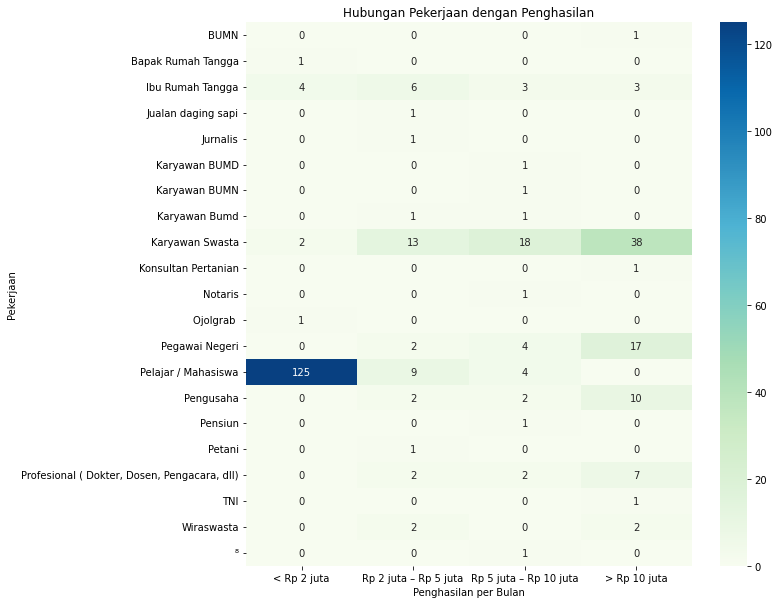

In [ ]:
# 1. Hubungan Pekerjaan dan Penghasilan

# Define column order
col_order = ['< Rp 2 juta', 'Rp 2 juta – Rp 5 juta', 'Rp 5 juta – Rp 10 juta', '> Rp 10 juta']

# Create a crosstab of the two attributes
ctab = pd.crosstab(data['Pekerjaan'], data['Penghasilan per Bulan'])
ctab = ctab.reindex(columns=col_order, fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(ctab, annot=True, cmap='GnBu', fmt='g')

# Heat Map Title
plt.title("Hubungan Pekerjaan dengan Penghasilan")
plt.show()

Berdasarkan *heatmap* di atas, dapat disimpulkan bahwa:
1. Mayoritas responden merupakan pelajar/mahasiswa dengan penghasilan per bulan < 2 Rp 2 juta
2. Penghasilan > Rp 10 juta banyak dimiliki oleh Karyawan Swasta
3. Pekerjaan-pekerjaan lainnya memiliki penghasilan yang lebih beragam di bandingkan pelajar/mahasiswa dan karyawan swasta


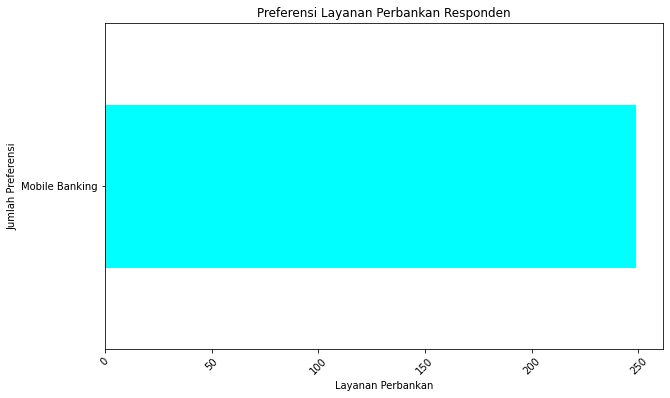

In [ ]:
# 2. Preferensi Layanan Perbankan

# Plotting
service_columns = [col for col in data.columns if col.startswith('layanan_aktif_')]
service_counts = data[service_columns].apply(pd.Series.value_counts).sum(axis=1).dropna().astype(int)
service_counts = service_counts.sort_values(ascending=False)

# Horizontal Bar Title
plt.figure(figsize=(10, 6))
service_counts.plot(kind='barh', color="cyan")
plt.title('Preferensi Layanan Perbankan Responden')
plt.xlabel('Layanan Perbankan')
plt.ylabel('Jumlah Preferensi')
plt.xticks(rotation=45)
plt.show()

Berdasarkan *horizontal bar* yang ada, dapat disimpulkan bahwa:
1. Layanan perbankan yang paling banyak digunakan responden adalah *mobile banking*
2. Hanya terdapat layanan perbankan *mobile banking* pada dataset
3. Layanan perbankan lainnya tidak ada di dataset karena memiliki jumlah *missing value* yang cukup besar
4. Layanan perbankan lainnya jarang digunakan oleh responden

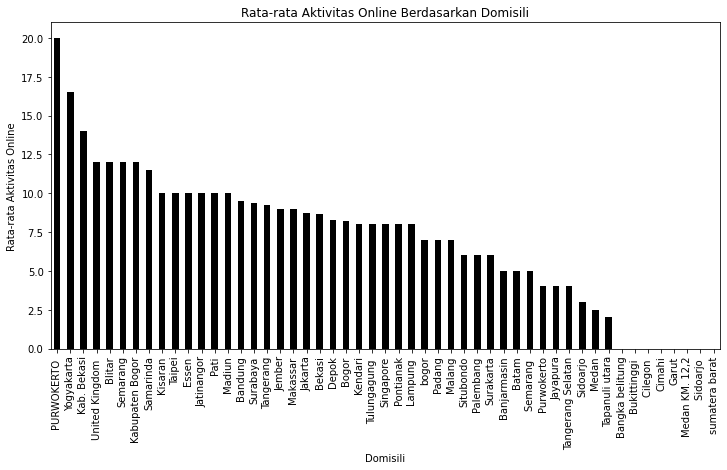

In [ ]:
# 3a. Rata-rata durasi internet responden berdasarkan domisili

# Plotting
online_activity_by_city = data.groupby('Domisili')['Durasi Internet'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
online_activity_by_city.plot(kind='bar', color='black')

# Bar Title
plt.title('Rata-rata Aktivitas Online Berdasarkan Domisili')
plt.xlabel('Domisili')
plt.ylabel('Rata-rata Aktivitas Online')
plt.show()

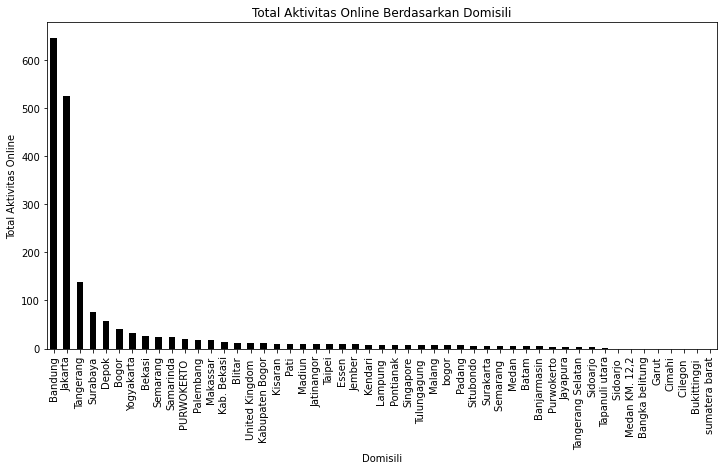

In [ ]:
# 3b. Total durasi internet berdasarkan domisili

# Plotting
online_activity_by_city = data.groupby('Domisili')['Durasi Internet'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
online_activity_by_city.plot(kind='bar', color='black')

# Bar Title
plt.title('Total Aktivitas Online Berdasarkan Domisili')
plt.xlabel('Domisili')
plt.ylabel('Total Aktivitas Online')
plt.show()

Berdasarkan dua diagram bar di atas, dapat disimpulkan bahwa:
- Rata-rata durasi internet responden Purwokerto tertinggi di antara domisili lainnya, yaitu sebesar 20 jam
- Total aktivitas online Bandung tertinggi di antara domisili lainnya
- Aktivitas online Bandung tinggi disebabkan oleh jumlah responden Bandung yang memang lebih banyak dari responden domisili lainnya akibat survei diadakan di kota Bandung karena pada diagram rata-rata, terlihat bahwa aktivitas online Bandung berada pada urutan ke-15

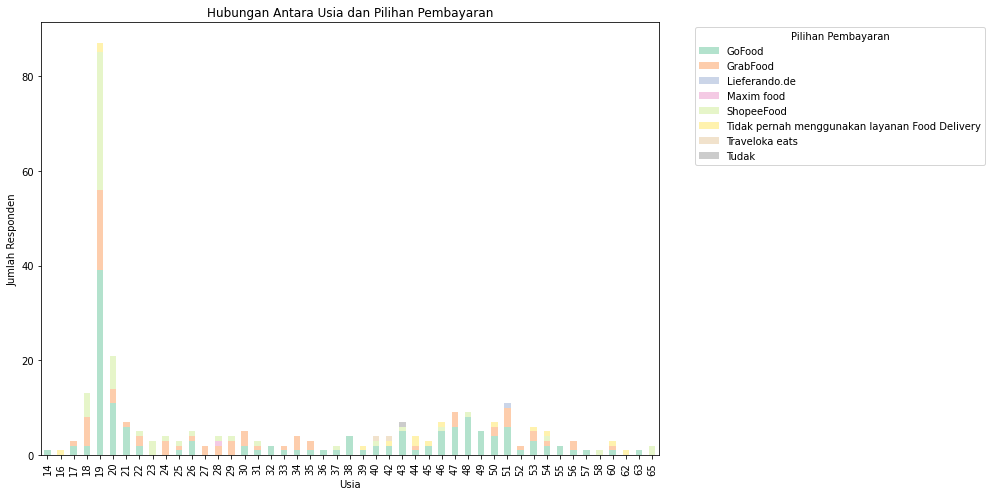

In [ ]:
# 4a. Keterkaitan Usia dan Pilihan Food Delivery

# Plotting
age_column = 'Usia'
payment_column = '50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'
age_payment_ct = pd.crosstab(data[age_column], data[payment_column])
age_payment_ct.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Pastel2')

# Stack Bar Title
plt.title('Hubungan Antara Usia dan Pilihan Pembayaran')
plt.xlabel('Usia')
plt.ylabel('Jumlah Responden')
plt.legend(title='Pilihan Pembayaran', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

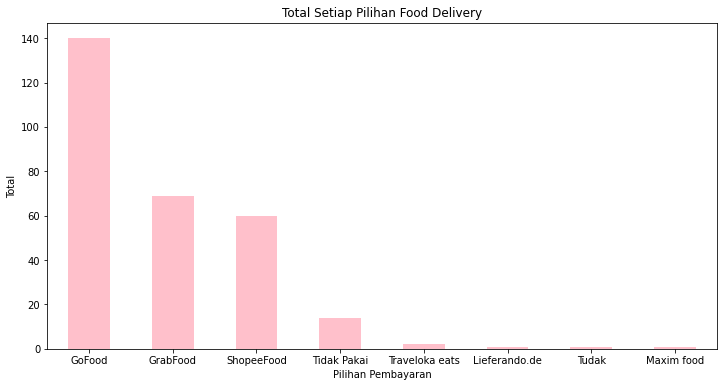

In [ ]:
# 4b. Total Data Pilihan Food Delivery

# Rename kolom
data_renamed = data.copy()
data_renamed[payment_column] = data_renamed[payment_column].replace(
    {'Tidak pernah menggunakan layanan Food Delivery': 'Tidak Pakai'}
)
payment_choice_counts_renamed = data_renamed[payment_column].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
payment_choice_counts_renamed.plot(kind='bar', color='pink')

# Bar Title
plt.title('Total Setiap Pilihan Food Delivery')
plt.xlabel('Pilihan Pembayaran')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.show()

Berdasarkan *stacked bar* dan *bar diagram* di atas, dapat disimpulkan bahwa:
1. Mayoritas responden yang menggunakan *food delivery* berada pada usia 19 tahun
2. *Food delivery* favorit responden adalah GoFood
3. GrabFood dan ShopeeFood memiliki jumlah responden dengan selisih yang tipis
4. Masih ada responden yang tidak menggunakan layanan *food delivery*

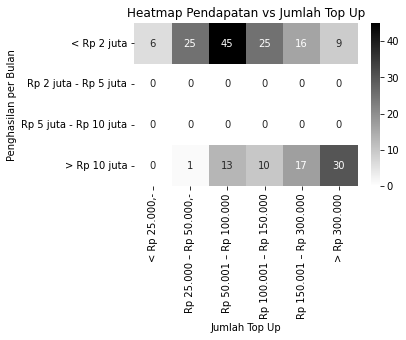

In [ ]:
# 5. Analisis keluhan belanja online

# Define order
col_order = ['< Rp 25.000,-', 'Rp 25.000 – Rp 50.000,-', 'Rp 50.001 – Rp 100.000', 'Rp 100.001 – Rp 150.000', 'Rp 150.001 – Rp 300.000', '> Rp 300.000']
row_order = ['< Rp 2 juta', 'Rp 2 juta - Rp 5 juta', 'Rp 5 juta - Rp 10 juta', '> Rp 10 juta']

# Mencari kolom
income_column = 'Penghasilan per Bulan'
top_up_column = '39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?'

# Plotting
if income_column in data.columns and top_up_column in data.columns:
    income_top_up_ct = pd.crosstab(data[income_column], data[top_up_column])
    income_top_up_ct = income_top_up_ct.reindex(index=row_order, columns=col_order, fill_value=0)
    plt.figure(figsize=(5, 3))
    sns.heatmap(income_top_up_ct, annot=True, cmap='binary', fmt='d')

# Heatmap Title
plt.title('Heatmap Pendapatan vs Jumlah Top Up')
plt.xlabel('Jumlah Top Up')
plt.ylabel('Penghasilan per Bulan')
plt.show()


Berdasarkan *heat map* di atas, dapat disimpulkan bahwa:
1. Mayoritas responden memiliki penghasilan per bulan < Rp 2 juta yang jumlah top up per bulannya berkisaran dari Rp 50.001 sampai Rp 100.000
2. Responden dengan penghasilan dari Rp 2 juta sampai Rp 10 juta tidak melakukan top up per bulan
3. Responden survei ini yang melakukan top up hanya responden dengan penghasilan per bulan < Rp 2 juta atau penghasilan per bulan > Rp 10 juta
4. Semakin besar penghasilan seseorang, jumlah top up per bulannya semakin banyak, hal ini disimpulkan dari responden dengan penghasilan < Rp 2 juta yang memiliki tren top up di tengah, sedangkan responden dengan penghasilan > 10 juta memiliki tren top up rata kanan (jumlah besar, lebih dari Rp 300.000)

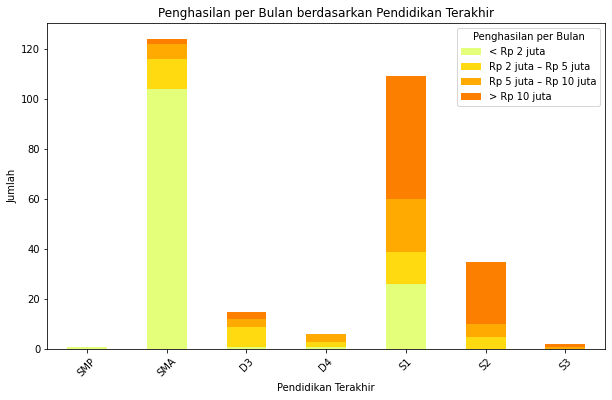

In [ ]:
# 6. Hubungan pendidikan dengan penghasilan

# Plotting
dict = {}
row_order = ['S3', 'S2', 'S1', 'D4', 'D3', 'SMA', 'SMP']
col_idx_pendidikan = 0
col_idx_penghasilan = 0
i = 0
for col in data.columns:
    if col == 'Pendidikan Terakhir':
        col_idx_pendidikan = i
    if col == 'Penghasilan per Bulan':
        col_idx_penghasilan = i
    i += 1
row_order.reverse()
for val in row_order:
    dict[val] = {
            '< Rp 2 juta':0, 'Rp 2 juta – Rp 5 juta':0, 'Rp 5 juta – Rp 10 juta':0, '> Rp 10 juta':0
        }
for row in data.values:
    dict[row[col_idx_pendidikan]][row[col_idx_penghasilan]] += 1

# Stacked Bar Title
df = pd.DataFrame(dict)
df = df.T
plt.figure(figsize=(10, 6))
df.plot(kind='bar', stacked=True, colormap="Wistia", ax=plt.gca())
plt.title('Penghasilan per Bulan berdasarkan Pendidikan Terakhir')
plt.xlabel('Pendidikan Terakhir')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Penghasilan per Bulan')
plt.show()

Berdasarkan *stacked bar* di atas, dapat disimpulkan bahwa:
1. Mayoritas responden SMP dan SMA memiliki penghasilan kurang dari Rp 2 juta
2. Mayoritas responden S1, S2, dan S3 memiliki penghasilan lebih dari 10 juta
3. Semakin tinggi pendidikan responden, semakin tinggi pula penghasilannya
4. Tidak selalu pendidikan lebih tinggi memiliki penghasilan yang lebih besar

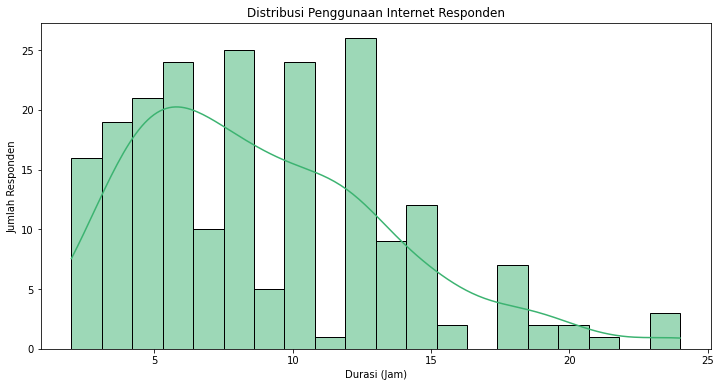

In [ ]:
# 7. Distribusi durasi penggunaan internet oleh responden

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data['Durasi Internet'], bins=20, kde=True, color='mediumseagreen')

# Histogram Title
plt.title('Distribusi Penggunaan Internet Responden')
plt.xlabel('Durasi (Jam)')
plt.ylabel('Jumlah Responden')
plt.show()

Berdasarkan histogram di atas, dapat disimpulkan bahwa:
1. Mayoritas responden menggunakan internet selama 11-12 jam
2. Terdapat *outliner* yang menggunakan internet selama 24 jam
3. Internet menjadi salah satu hal yang tidak terlepaskan dari kehidupan manusia melihat begitu banyaknya responden yang menggunakan internet dengan waktu yang cukup lama

<Figure size 864x432 with 0 Axes>

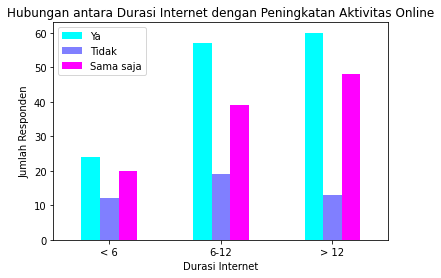

In [ ]:
# 8. Hubungan durasi internet dengan aktivitas online meningkat

# Counting
dict = {}
col_idx_durasi = 0
col_idx_meningkat = 0
i = 0
for col in data.columns:
    if col == 'Aktivitas Online Meningkat':
        col_idx_meningkat = i
    if col == 'Durasi Internet':
        col_idx_durasi = i
    i += 1

row_order = ['Ya', 'Tidak', 'Sama saja']
for val in row_order:
    dict[val] = {
            '< 6' : 0, '6-12' : 0, '> 12' : 0
        }
for row in data.values:
    if row[col_idx_durasi] < 6:
        dict[row[col_idx_meningkat]]['< 6'] += 1
    elif row[col_idx_durasi] < 13:
        dict[row[col_idx_meningkat]]['6-12'] += 1
    else:
        dict[row[col_idx_meningkat]]['> 12'] += 1

# Plotting
df = pd.DataFrame(dict)
plt.figure(figsize=(12, 6))
df.plot(kind='bar', cmap='cool')
plt.title('Hubungan antara Durasi Internet dengan Peningkatan Aktivitas Online')
plt.ylabel('Jumlah Responden')
plt.xlabel('Durasi Internet')
plt.xticks(rotation=0)
plt.show()

Berdasarkan *bar chart* di atas, dapat disimpulkan bahwa:
1. Durasi internet mayoritas masyarakat lebih dari 12 jam
2. Mayoritas responden mengalami peningkatan aktivitas online
3. Semakin besar durasi internet seseorang, semakin besar pula kemungkinann peningkatan aktivitas online

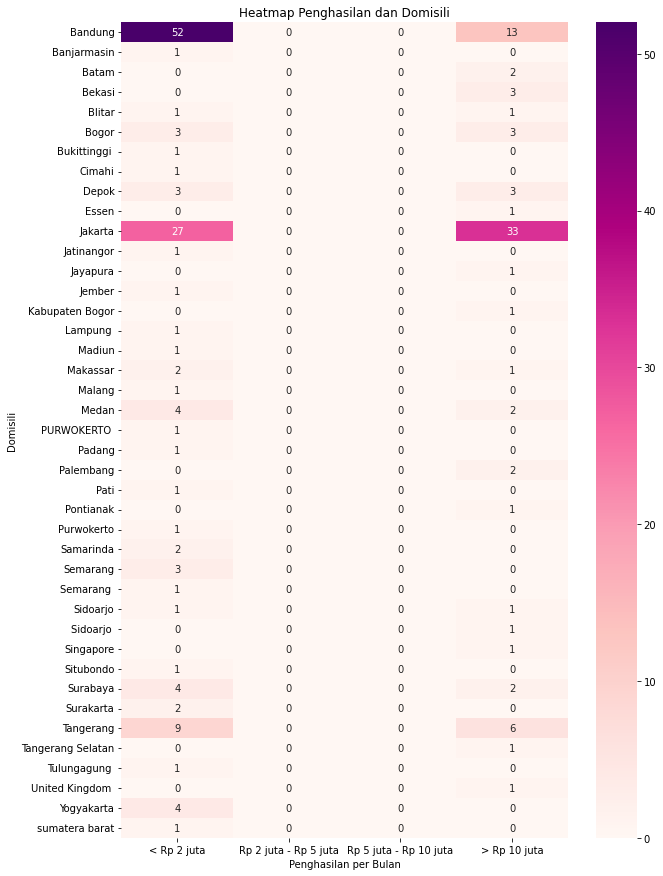

In [ ]:
# 9. Hubungan domisili dengan penghasilan per bulan

# Counting
col_order = ['< Rp 2 juta', 'Rp 2 juta - Rp 5 juta', 'Rp 5 juta - Rp 10 juta', '> Rp 10 juta']
if 'Penghasilan per Bulan' in data.columns and 'Domisili' in data.columns:
    heatmap_data = pd.crosstab(data['Domisili'], data['Penghasilan per Bulan'])
    heatmap_data = heatmap_data.reindex(columns=col_order, fill_value=0)
    for i in heatmap_data.index:
        if heatmap_data.loc[i].sum() == 0:
            heatmap_data = heatmap_data.drop(i)

    # Plotting the heatmap
    plt.figure(figsize=(10, 15))
    sns.heatmap(heatmap_data, annot=True, cmap='RdPu', fmt='d')
    plt.title('Heatmap Penghasilan dan Domisili')
    plt.xlabel('Penghasilan per Bulan')
    plt.ylabel('Domisili')
    plt.xticks(rotation=0)
    plt.show()

Berdasarkan *heat map* di atas, dapat disimpulkan bahwa:
1. Mayoritas responden berasal dari Bandung dengan pendapatan kurang dari 2 juta
2. Responden yang berasal dari Jakarta mayoritas berpenghasilan lebih dari 10 juta
3. Responden lainnya tersebar ke berbagai daerah lainnya dengan penghasilan yang tersebar pula

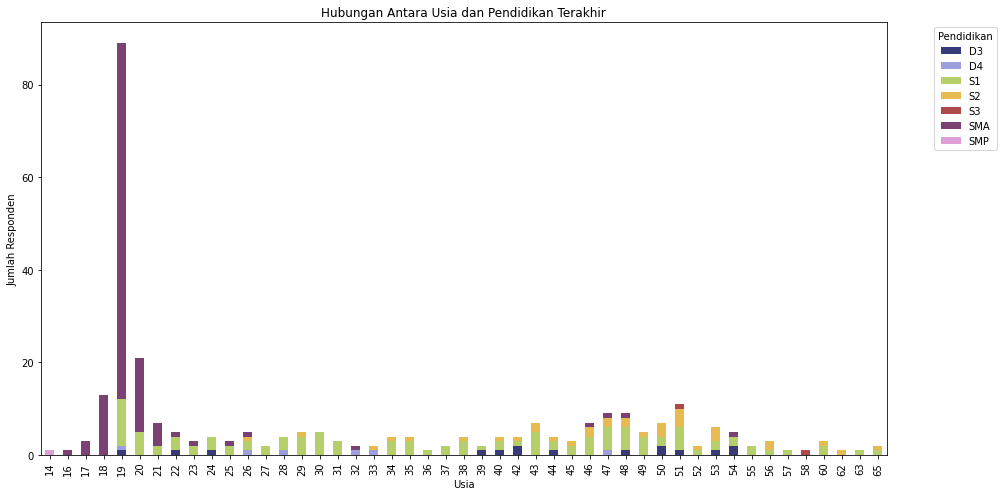

In [ ]:
# 10. Hubungan Usia dengan Pendidikan Terakhir

# Plotting
age_column = 'Usia'
edu_column = 'Pendidikan Terakhir'
age_edu_ct = pd.crosstab(data[age_column], data[edu_column])
age_edu_ct.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20b')

# Stack Bar Title
plt.title('Hubungan Antara Usia dan Pendidikan Terakhir')
plt.xlabel('Usia')
plt.ylabel('Jumlah Responden')
plt.legend(title='Pendidikan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan *stack bar chart* di atas, dapat disimpulkan bahwa:
1. Mayoritas responden memiliki pendidikan terakhir SMA dengan usia 19 tahun
2. Responden dengan umur 19 ke atas memiliki persebaran pendidikan terakhir S1 yang lumayan rata

### 5b. Storytelling With Data
Dalam kajian yang mendalam terhadap perilaku konsumen, status ekonomi, dan keterlibatan digital, data visualisasi telah membuka tabir bagaimana masyarakat berinteraksi dengan teknologi di kehidupan sehari-hari. Di sektor layanan pengantaran makanan, terlihat adanya preferensi yang kuat dengan GoFood yang mendominasi pilihan di kalangan usia muda, khususnya mereka yang berumur 19 tahun. Layanan lain seperti GrabFood dan ShopeeFood juga menunjukkan kehadiran yang kuat, namun dengan persaingan yang ketat, mencerminkan pasar yang dinamis dan beragam dalam hal pilihan konsumen.

Namun, terdapat juga segmen masyarakat yang tidak menggunakan layanan pengantaran makanan, yang mungkin memilih opsi makan di luar atau metode tradisional lainnya. Ini menunjukkan adanya variasi dalam preferensi konsumsi yang dapat dipengaruhi oleh faktor-faktor seperti aksesibilitas, kenyamanan, atau bahkan kebiasaan pribadi.

Ketika meninjau pola pengeluaran melalui heatmap keuangan, kita melihat korelasi langsung antara tingkat penghasilan dengan perilaku konsumsi. Individu dengan pendapatan yang lebih rendah menunjukkan penggunaan top-up bulanan yang lebih hemat, sedangkan mereka dengan penghasilan yang lebih tinggi lebih cenderung untuk melakukan top-up dalam jumlah yang lebih besar, menandakan adanya variasi dalam kemampuan finansial dan pendekatan terhadap pengeluaran digital.

Pendidikan terakhir responden memperlihatkan dinamika yang menarik. Di usia 19 tahun, mayoritas adalah lulusan SMA, mengindikasikan titik di mana banyak individu mungkin tengah bertransisi dari pendidikan menengah ke tinggi. Di usia yang lebih tua, persebaran lulusan S1 menjadi lebih merata, mencerminkan penyebaran yang lebih luas dari latar belakang pendidikan tinggi.

Pola penggunaan internet mengungkapkan bahwa mayoritas responden menghabiskan 11-12 jam sehari secara online. Ini menegaskan bahwa internet telah menjadi bagian integral dari kehidupan banyak orang. Lebih jauh, responden yang menghabiskan lebih dari 12 jam di internet cenderung mengalami peningkatan aktivitas online, memperkuat gagasan bahwa keterhubungan internet yang berkepanjangan menyediakan lebih banyak peluang untuk keterlibatan digital.

Dari perspektif geografis, terdapat perbedaan yang mencolok antara Bandung dan Jakarta. Di Bandung, mayoritas responden memiliki penghasilan kurang dari 2 juta, sementara di Jakarta, penghasilan mayoritas responden melebihi 10 juta. Kontras ini menyoroti perbedaan ekonomi yang mencolok antar wilayah, yang mungkin dipengaruhi oleh peluang pekerjaan yang berbeda, biaya hidup, serta akses ke pendidikan dan pelatihan yang lebih baik.

Dengan memahami perbedaan-perbedaan ini, kita dapat menyimpulkan bahwa ada hubungan erat antara latar belakang pendidikan, durasi penggunaan internet, dan status ekonomi terhadap perilaku digital seseorang. Transisi ke dunia digital terlihat tidak hanya dipengaruhi oleh faktor teknologi semata, melainkan juga oleh kondisi sosial dan ekonomi yang membentuk kebiasaan serta akses terhadap sumber daya digital.

Narasi yang berbasis pada data ini menunjukkan bahwa ada keterkaitan kompleks antara demografi, ekonomi, dan teknologi dalam kehidupan sehari-hari. Ini memberikan wawasan tentang bagaimana berbagai latar belakang individu dapat mempengaruhi cara mereka berinteraksi dengan dunia maya, dan sejauh mana faktor-faktor tersebut memainkan peran dalam kehidupan digital mereka, menandakan pola sosioekonomi yang berlapis dalam masyarakat modern.